<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html hw3.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

# PHY321: Classical Mechanics 1
**Homework 3**
Bergen Kendziorski

### Practicalities about  homeworks and projects

1. You can work in groups (optimal groups are often 2-3 people) or by yourself. If you work as a group you can hand in one answer only if you wish. **Remember to write your name(s)**!

2. Homeworks are available ten days  before the deadline. 

3. How do I(we)  hand in?  You can hand in the paper and pencil exercises as a  scanned document. For this homework this applies to exercises 1-5. Alternatively, you can hand in everything (if you are ok with typing mathematical formulae using say Latex) as a jupyter notebook at D2L. The numerical exercise(s) (exercise 6 here) should always be handed in as a jupyter notebook by the deadline at D2L.

### Introduction to homework 3

This week's sets of classical pen and paper and computational
exercises deal with the motion of different objects under the
influence of various forces. The relevant reading background is
1. chapter 2 of Taylor (there are many good examples there) and

2. chapters 5-7 of Malthe-Sørenssen.

In both textbooks there are many nice worked out
examples. Malthe-Sørenssen's text contains also several coding
examples you may find useful.

There are several pedagogical aims we have in mind with these exercises:
1. Get practice in setting up and analyzing a physical problem, finding the forces and the relevant equations to solve;

2. Analyze the results and ask yourself whether they make sense or not;

3. Finding analytical solutions to problems if possible and compare these with numerical results. This teaches us also how to understand errors in numerical calculations;

4. Being able to solve (in mechanics these are the most common types of equations) numerically ordinary differential equations and compare the solutions where possible with analytical solutions;

5. Getting used to studying physical problems using all possible tools, from paper and pencil to numerical solutions;

6. Then analyze the results and ask yourself whether they make sense or not.

The above steps outline important elements of our understanding of the
scientific method. Furthermore, there are also explicit coding skills
we aim at such as setting up arrays, solving differential equations
numerically and plotting your results.  Coding practice is also an
important aspect. The more we practice the better we get (hopefully).
From a numerical mathematics point of view, we will solve the differential
equations using Euler's method (forward Euler).

The code we will develop can be reused as a basis for coming homeworks. We can
also extend the numerical solver we write here to include other methods (later) like
the modified Euler method (Euler-Cromer, midpoint Euler) and more
advanced methods like the family of Runge-Kutta methods and the Velocity-Verlet method.

At the end of this course, we will thus have developed a larger code
(or set of codes) which will allow us to study different numerical
methods (integration and differential equations) as well as being able
to study different physical systems. Combined with analytical skills,
the hope is that this can allow us to explore interesting and
realistic physics problems. By doing so, the hope is that can lead to
deeper insights about the laws of motion which govern a system.

And hopefully you can reuse many of the above solvers in other courses (our ideal).

### Exercise 1 (20 pt), Electron moving into an electric field

An electron is sent through a varying electrical
field. Initially, the electron is moving in the $x$-direction with a velocity
$v_x = 100$ m/s. The electron enters the field when it passes the origin. The field
varies with time, causing an acceleration of the electron that varies in time

$$
\boldsymbol{a}(t)=\left(−20 \mathrm{m/s}^2 −10\mathrm{m/s}^3t\right) \boldsymbol{e}_y
$$

* 1a (4pt) Find the velocity as a function of time for the electron.

* 1b (4pt)  Find the position as a function of time for the electron.

The field is only acting inside a box of length $L = 2m$.
* 1c (4pt)  How long time is the electron inside the field?

* 1d (4pt)  What is the displacement in the $y$-direction when the electron leaves the box. (We call this the deflection of the electron).

* 1e (4pt)  Find the angle the velocity vector forms with the horizontal axis as the electron leaves the box.

### Exercise 2 (10 pt), Drag force

Taylor exercise 2.3

### Exercise 3 (10 pt), Falling object

Taylor exercise 2.6

### Exercise 4 (10 pt), and then a cyclist

Taylor exercise 2.26

### Exercise 5 (10 pt), back to a falling ball and preparing for the numerical exercise

**Useful material: Malthe-Sørenssen chapter 7.5 and Taylor chapter 2.4.**

In this example we study the motion of an object subject to a constant force, a velocity dependent
force. We will  reuse the code we develop here in homework 4 for a position-dependent force.

Here we limit ourselves to a ball that is thrown from a height $h$
above the ground with an initial velocity
$\boldsymbol{v}_0$ at time $t=t_0$. We assume the air resistance is proportional  to the square velocity, Together with the gravitational force these are the forces acting on our system.
**Note that due to the specific velocity dependence, we cannot find an analytical solution for motion in the $x$ and $y$ directions, see the discussion in Taylor after eq. (2.61).**
In order to find an analytical solution we need to assume that the object is falling in the $y$-direction (negative direction) only. 

The position of the ball as function of time is  $\boldsymbol{r}(t)$ where $t$ is time.
 The position is measured with respect to a coordinate system with origin at the floor.

We assume we have an initial position $\boldsymbol{r}(t_0)=h\boldsymbol{e}_y$ and an initial velocity $\boldsymbol{v}_0=v_{x,0}\boldsymbol{e}_x+v_{y,0}\boldsymbol{e}_y$.

In this exercise we assume the system is influenced by the gravitational force

$$
\boldsymbol{G}=-mg\boldsymbol{e}_y
$$

and an air resistance given by a square law

$$
-Dv\boldsymbol{v}.
$$

The analytical expressions for velocity and position as functions of
time will be used to compare with the numerical results in exercise 6.

* 5a (3pt) Identify the forces acting on the ball and set up a diagram with the forces acting on the ball. Find the acceleration of the falling ball. 

* 5b (4pt) Assume now that the object is falling only in the $y$-direction (negative direction). Integrate the acceleration from an initial time $t_0$ to a final time $t$ and find the velocity. In Taylor equations (2.52) to (2.58) you will find a very good discussion of this.

* 5c (4pt) Find thereafter the position as function of time starting with an initial time $t_0$. Find the time it takes to hit the floor.  Here you will find it convenient to set the initial velocity in the $y$-direction to zero. Taylor equations (2.52)-(2.58) should contain all relevant information for solving this part as well.

We will use the above analytical results in our numerical calculations in exercise 6. The analytical solution in the $y$-direction only will serve as a test for our numerical solution.

### Exercise 6 (40pt), Numerical elements, solving exercise 5 numerically

**This exercise should be handed in as a jupyter-notebook** at D2L. Remember to write your name(s). 

Last week we:
1. Gained more practice with plotting in Python

2. Became familiar with arrays and representing vectors with such objects

This week we will:
1. Learn and utilize Euler's Method to find the position and the velocity

2. Compare analytical and computational solutions 

3. Add additional forces to our model

In [3]:
%matplotlib inline

# let's start by importing useful packages we are familiar with
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

We will choose the following values
1. mass $m=0.2$ kg

2. accelleration (gravity) $g=9.81$ m/s$^{2}$.

3. initial position is the height $h=2$ m

4. initial velocities $v_{x,0}=v_{y,0}=10$ m/s

Can you find a reasonable value for the drag coefficient $D$?
You need also to define an initial time and 
the step size $\Delta t$. We can define the step size $\Delta t$ as the difference between any
two neighboring values in time (time steps) that we analyze within
some range. It can be determined by dividing the interval we are
analyzing, which in our case is time $t_{\mathrm{final}}-t_0$, by the number of steps we
are taking $(N)$. This gives us a step size $\Delta t = \dfrac{t_{\mathrm{final}}-t_0}{N}$.

With these preliminaries we are now ready to plot our results from exercise 5.

* 6a (10pt) Set up arrays for time, velocity, acceleration and positions for the results from exercise 5. Define an initial and final time. Choose the final time to be the time when the ball hits the ground for the first time. Make a plot of the position and velocity as functions of time.  Here you could set the initial velocity in the $y$-direction to zero and use the result from exercise 5. Else you need to try different initial times using the result from exercise 5 as a starting guess.  It is not critical if you don't reach the ground when the initial velocity in the $y$-direction is not zero.

We move now to the numerical solution of the differential equations as discussed in the [lecture notes](https://mhjensen.github.io/Physics321/doc/pub/motion/html/motion.html) or Malthe-Sørenssen chapter 7.5.
Let us remind ourselves about  Euler's Method.

Suppose we know $f(t)$ and its derivative $f'(t)$. To find $f(t+\Delta t)$ at the next step, $t+\Delta t$,
we can consider the Taylor expansion:

$f(t+\Delta t) = f(t) + \dfrac{(\Delta t)f'(t)}{1!} + \dfrac{(\Delta t)^2f''(t)}{2!} + ...$

If we ignore the $f''$ term and higher derivatives, we obtain

$f(t+\Delta t) \approx f(t) + (\Delta t)f'(t)$.

This approximation is the basis of Euler's method, and the Taylor
expansion suggests that it will have errors of $O(\Delta t^2)$.  Thus, one
would expect it to work better, the smaller the step size $h$ that you
use. In our case the step size is $\Delta t$. 

In setting up our code we need to

1. Define and obtain all initial values, constants, and time to be analyzed with step sizes as done above (you can use the same values)

2. Calculate the velocity using $v_{i+1} = v_{i} + (\Delta t)*a_{i}$

3. Calculate the position using $pos_{i+1} = r_{i} + (\Delta t)*v_{i}$

4. Calculate the new acceleration $a_{i+1}$.

5. Repeat steps 2-4 for all time steps within a loop.

* 6b (20 pt) Write a code which implements Euler's method and compute numerically and plot the position and velocity as functions of time for various values of $\Delta t$. Comment your results.

* 6c (10pt) Compare your numerically obtained positions and velocities with the analytical results from exercise 5. In order to do this, you need to take out the motion in the $x$-direction. Comment again your results.

terminal velocity: -28.014282071829005  m/s
time when ball hits ground: 0.6412147814329887  m


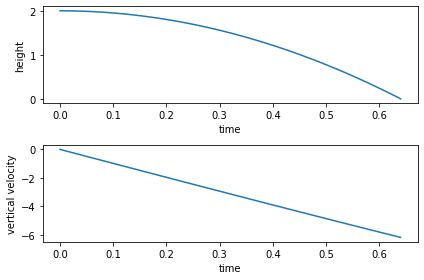

In [13]:
#6a) Analytical Solution Plotting
m = .2
g = 9.81
h = 2
vx0 = 10 #we won't use this until part b
vy0 = 10 #again, we won't use this until part b
t_initial = 0
#I will set drag coefficient using the fact that we know for a sphere, D = gamma * diameter^2. Gamma is .25 for spheres in STP
#    conditions (such as air). I'll estimate our ball to have a diameter of 10cm = .1m, thus D = .25 * .1^2 = .0025.
D = .0025


#final time is when ball hits ground, to find this I need to find the terminal velocity
v_ter = -1*math.sqrt(m*g/D)
print("terminal velocity:", v_ter, " m/s")
t_final = -v_ter*np.arccosh(math.exp(h*g/(v_ter**2)))/g
print("time when ball hits ground:", t_final, " m")
#so we have final time of around .64 seconds
#I'll use standard intervals of .01 seconds


times = np.arange(0,.65,.01) #went from time 0 to .64 with steps of .01
y_positions = (-v_ter**2 * np.log(np.cosh(g*times/v_ter)) / g) + h
y_velocities = v_ter * np.tanh(-g*times/v_ter) #if we wanted an initial velocity we would add that on here
y_accelerations = (-m*g-D*y_velocities*y_velocities)/m

#graphing the velocity and position over time
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.plot(times, y_positions)
plt.xlabel("time")
plt.ylabel("height")

plt.subplot(2, 1, 2)
plt.plot(times, y_velocities)
plt.xlabel("time")
plt.ylabel("vertical velocity")

fig.tight_layout()
plt.show()

All plots are for delta T of .01 seconds


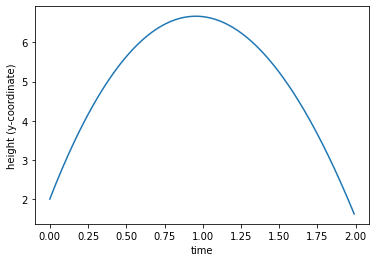

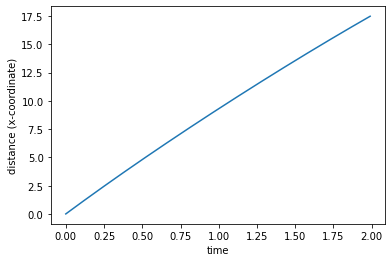

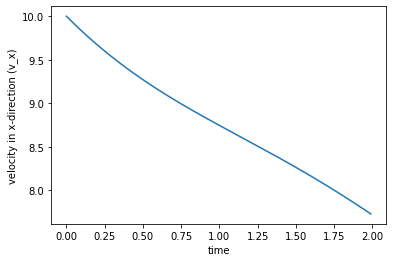

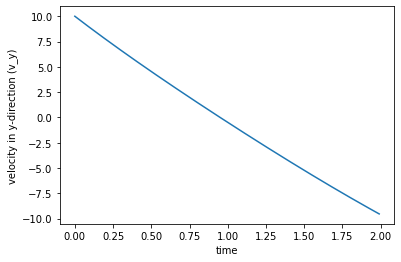

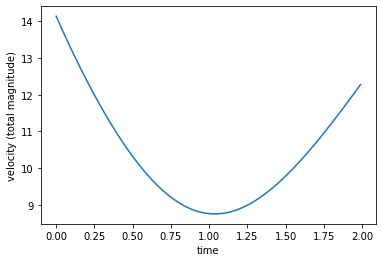

In [14]:
#6b) #using given initial conditions of initial velocity in both x and y directions of +10 m/s
m = .2
g = 9.81
h = 2
vx0 = 10
vy0 = 10
delta_t = .01
t_initial = 0
#I will set drag coefficient using the fact that we know for a sphere, D = gamma * diameter^2. Gamma is .25 for spheres in STP
#    conditions (such as air). I'll estimate our ball to have a diameter of 10cm = .1m, thus D = .25 * .1^2 = .0025.
D = .0025


#so we have final time of around .64 seconds
#I'll use standard intervals of .01 seconds
times = np.arange(0, 2,delta_t) #went from time 0 to 2 with steps of .01
#------------------
#everything above was ensuring variables are the same from before

#since this is multidimensional, my position, velocity and acceleration arrays need to be too
num_times = len(times)
r = np.zeros((num_times,2))
v = np.zeros((num_times,2))

r[0] = np.array([0,h])
v[0] = np.array([vx0,vy0])
for i in range(1,num_times): #don't want to change index 0, want to go through to the end i.e. index num_times - 1
    #I'm going to change r[i] and v[i] using r[i-1] and v[i-1]
    #could have done range(num_times-1) and changed r[i+1] and v[i+1] using r[i] and v[i]
    
    #first calculate force and acceleration based off of previous velocity
    force_ar = -D * v[i-1] * math.sqrt(sum((v[i-1])*v[i-1]))
    acceleration = ([0,-9.81*m] + force_ar)/m
    
    v[i] = v[i-1] + delta_t*acceleration
    r[i] = r[i-1] + delta_t*v[i-1]
    

#getting magnitude of velocity at each point in time
v_mag = []
for elem in v:
    v_mag.append(math.sqrt(elem[0]**2 + elem[1]**2))
    

print("All plots are for delta T of .01 seconds")



plt.plot(times, r[:,1]) #y-coordinate is second column of every row
plt.xlabel("time")
plt.ylabel("height (y-coordinate)")
plt.show()

plt.plot(times, r[:,0])
plt.xlabel("time")
plt.ylabel("distance (x-coordinate)")
plt.show()

plt.plot(times, v[:,0])
plt.xlabel("time")
plt.ylabel("velocity in x-direction (v_x)")
plt.show()

plt.plot(times, v[:,1])
plt.xlabel("time")
plt.ylabel("velocity in y-direction (v_y)")
plt.show()

plt.plot(times, v_mag)
plt.xlabel("time")
plt.ylabel("velocity (total magnitude)")
plt.show()

We can see in all of these plots that gravity is the dominant force in the y-direction, but air resistance is always resisting the motion. This is especially apparent in the x-direction, where we can see the x-velocity decreasing over time, and decreasing more when the total velocity magnitude is higher. It's also apparent from the fact that our total velocity magnitude is smaller at the time it reaches the initial height than the initial total velocity magnitude.

Now, we look at what happens when we change our timestep.

All plots are for delta T of .001 seconds


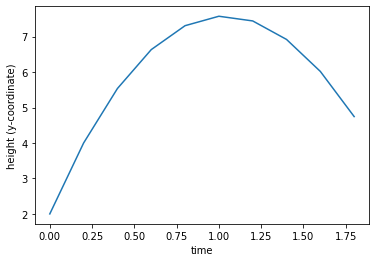

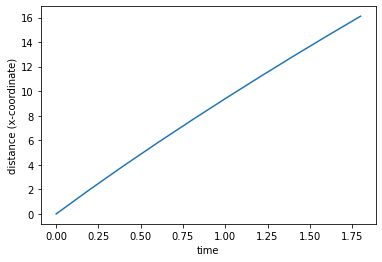

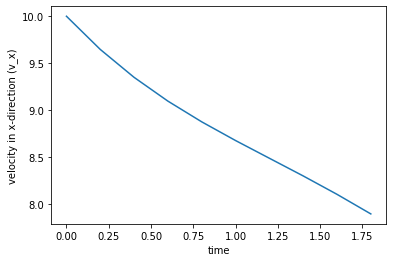

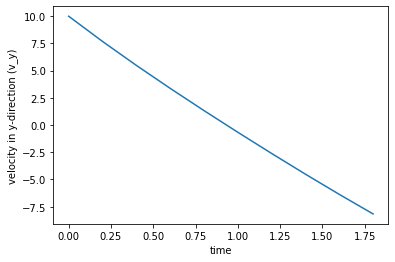

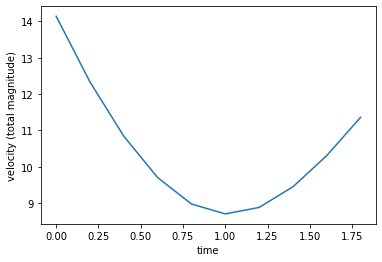

In [18]:
#6b continued)
#this is changing delta T to be larger, .1

#6b)
m = .2
g = 9.81
h = 2
vx0 = 10
vy0 = 10
delta_t = .2
t_initial = 0
#I will set drag coefficient using the fact that we know for a sphere, D = gamma * diameter^2. Gamma is .25 for spheres in STP
#    conditions (such as air). I'll estimate our ball to have a diameter of 10cm = .1m, thus D = .25 * .1^2 = .0025.
D = .0025


#so we have final time of around .64 seconds
#I'll use standard intervals of .01 seconds
times = np.arange(0,2,delta_t) #went from time 0 to .64 with steps of .01
#------------------
#everything above was ensuring variables are the same from before

#since this is multidimensional, my position, velocity and acceleration arrays need to be too
num_times = len(times)
r = np.zeros((num_times,2))
v = np.zeros((num_times,2))

r[0] = [0,h]
v[0] = [vx0,vy0]
for i in range(1,num_times): #don't want to change indexd 0, want to go through to the end i.e. index num_times - 1
    #I'm going to change r[i] and v[i] using r[i-1] and v[i-1]
    #could have done range(num_times-1) and changed r[i+1] and v[i+1] using r[i] and v[i]
    
    #first calculate force and acceleration based off of previous velocity
    force_ar = -D * v[i-1] * math.sqrt(sum((v[i-1])*v[i-1]))
    acceleration = ([0,-9.81*m] + force_ar)/m
    
    v[i] = v[i-1] + delta_t*acceleration
    r[i] = r[i-1] + delta_t*v[i-1]
    

#getting magnitude of velocity at each point in time
v_mag = []
for elem in v:
    v_mag.append(math.sqrt(elem[0]**2 + elem[1]**2))
    

print("All plots are for delta T of .001 seconds")



plt.plot(times, r[:,1]) #y-coordinate is second column of every row
plt.xlabel("time")
plt.ylabel("height (y-coordinate)")
plt.show()

plt.plot(times, r[:,0])
plt.xlabel("time")
plt.ylabel("distance (x-coordinate)")
plt.show()

plt.plot(times, v[:,0])
plt.xlabel("time")
plt.ylabel("velocity in x-direction (v_x)")
plt.show()

plt.plot(times, v[:,1])
plt.xlabel("time")
plt.ylabel("velocity in y-direction (v_y)")
plt.show()

plt.plot(times, v_mag)
plt.xlabel("time")
plt.ylabel("velocity (total magnitude)")
plt.show()

We can see that this time step still generally works, but nothing is as precise as it was before. Our graphs look a bit blocky and would get worse if we further increased the time step. Additionally, the larger time steps will result in numbers being more significantly different from the analytical results, although this isn't as apparent since I'm working in two dimensions (analytical solution is only for one dimension).

All plots are for delta T of .01 seconds


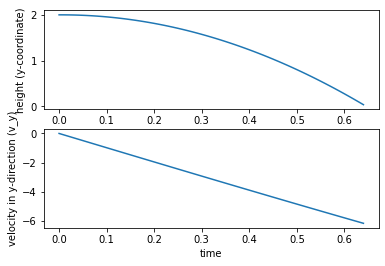

In [19]:
#6c)
m = .2
g = 9.81
h = 2
#no longer any initial velocity so that we can properly compare
delta_t = .01
t_initial = 0
#I will set drag coefficient using the fact that we know for a sphere, D = gamma * diameter^2. Gamma is .25 for spheres in STP
#    conditions (such as air). I'll estimate our ball to have a diameter of 10cm = .1m, thus D = .25 * .1^2 = .0025.
D = .0025


#so we have final time of around .64 seconds
#I'll use standard intervals of .01 seconds
times = np.arange(0,.65,delta_t) #went from time 0 to .64 with steps of .01
#------------------
#everything above was ensuring variables are the same from before

#since this is multidimensional, my position, velocity and acceleration arrays need to be too
num_times = len(times)
r = np.zeros((num_times,2))
v = np.zeros((num_times,2))

r[0] = [0,h]
v[0] = [0,0]
for i in range(1,num_times): #don't want to change index 0, want to go through to the end i.e. index num_times - 1
    #I'm going to change r[i] and v[i] using r[i-1] and v[i-1]
    #could have done range(num_times-1) and changed r[i+1] and v[i+1] using r[i] and v[i]
    
    #first calculate force and acceleration based off of previous velocity
    force_ar = -D * v[i-1] * math.sqrt(sum((v[i-1])*v[i-1]))
    acceleration = ([0,-9.81*m] + force_ar)/m
    
    v[i] = v[i-1] + delta_t*acceleration
    r[i] = r[i-1] + delta_t*v[i-1]
    

    

print("All plots are for delta T of .01 seconds")


plt.subplot(2,1,1)
plt.plot(times, r[:,1]) #y-coordinate is second column of every row
plt.xlabel("time")
plt.ylabel("height (y-coordinate)")

plt.subplot(2,1,2)
plt.plot(times, v[:,1])
plt.xlabel("time")
plt.ylabel("velocity in y-direction (v_y)")
plt.show()

These are almost exactly the same graphs that I got in part a using the formulas I derived in question 5. The ball lands at shortly after 0.6 seconds which was the value I calculated from my equations as well. This shows that both methods appear to work, and clearly the numerical method developed has additional capabilities since it can work with 2D motion as well.


### Classical Mechanics Extra Credit Assignment: Scientific Writing and attending Talks

The following gives you an opportunity to earn **five extra credit
points** on each of the remaining homeworks and **ten extra credit points**
on the midterms and finals.  This assignment also covers an aspect of
the scientific process that is not taught in most undergraduate
programs: scientific writing.  Writing scientific reports is how
scientist communicate their results to the rest of the field.  Knowing
how to assemble a well written scientific report will greatly benefit
you in you upper level classes, in graduate school, and in the work
place.

The full information on extra credits is found at <https://github.com/mhjensen/Physics321/blob/master/doc/Homeworks/ExtraCredits/>. There you will also find examples on how to write a scientific article. 
Below you can also find a description on how to gain extra credits by attending scientific talks.

This assignment allows you to gain extra credit points by practicing
your scientific writing.  For each of the remaining homeworks you can
submit the specified section of a scientific report (written about the
numerical aspect of the homework) for five extra credit points on the
assignment.  For the two midterms and the final, submitting a full
scientific report covering the numerical analysis problem will be
worth ten extra points.  For credit the grader must be able to tell
that you put effort into the assignment (i.e. well written, well
formatted, etc.).  If you are unfamiliar with writing scientific
reports, [see the information here](https://github.com/mhjensen/Physics321/blob/master/doc/Homeworks/ExtraCredits/IntroductionScientificWriting.md)

The following table explains what aspect of a scientific report is due
with which homework.  You can submit the assignment in any format you
like, in the same document as your homework, or in a different one.
Remember to cite any external references you use and include a
reference list.  There are no length requirements, but make sure what
you turn in is complete and through.  If you have any questions,
please contact Julie Butler at butler@frib.msu.edu.

<table class="dotable" border="1">
<thead>
<tr><th align="center">  HW/Project </th> <th align="center">Due Date</th> <th align="center">Extra Credit Assignment</th> </tr>
</thead>
<tbody>
<tr><td align="center">   HW 3             </td> <td align="center">   2-4         </td> <td align="center">   Abstract                   </td> </tr>
<tr><td align="center">   HW 4             </td> <td align="center">   2-11        </td> <td align="center">   Introduction               </td> </tr>
<tr><td align="center">   HW 5             </td> <td align="center">   2-18        </td> <td align="center">   Methods                    </td> </tr>
<tr><td align="center">   HW 6             </td> <td align="center">   3-18        </td> <td align="center">   Results and Discussion     </td> </tr>
<tr><td align="center">   **Midterm 1**    </td> <td align="center">   **3-4**     </td> <td align="center">   *Full Written Report*      </td> </tr>
<tr><td align="center">   HW 7             </td> <td align="center">   3-25        </td> <td align="center">   Abstract                   </td> </tr>
<tr><td align="center">   HW 8             </td> <td align="center">   4-15        </td> <td align="center">   Introduction               </td> </tr>
<tr><td align="center">   HW 9             </td> <td align="center">   4-22        </td> <td align="center">   Results and Discussion     </td> </tr>
<tr><td align="center">   **Midterm 2      </td> <td align="center">   ** _4-8_    </td> <td align="center">   *Full Written Report*      </td> </tr>
<tr><td align="center">   HW 10            </td> <td align="center">   4-29        </td> <td align="center">   Abstract                   </td> </tr>
<tr><td align="center">   **Final**        </td> <td align="center">   **5-6**     </td> <td align="center">   *Full Written Report*      </td> </tr>
</tbody>
</table>

You can also gain extra credits if you attend scientific talks.
This is described here.

### Integrating Classwork With Research

This opportunity will allow you to earn up to 5 extra credit points on a Homework per week. These points can push you above 100% or help make up for missed exercises.
In order to earn all points you must:

1. Attend an MSU research talk (recommended research oriented Clubs is  provided below)

2. Summarize the talk using at least 150 words

3. Turn in the summary along with your Homework.

Approved talks:
Talks given by researchers through the following clubs:
* Research and Idea Sharing Enterprise (RAISE)​: Meets Wednesday Nights Society for Physics Students (SPS)​: Meets Monday Nights

* Astronomy Club​: Meets Monday Nights

* Facility For Rare Isotope Beam (FRIB) Seminars: ​Occur multiple times a week

If you have any questions please consult Julie or Morten

All the material on extra credits is at <https://github.com/mhjensen/Physics321/blob/master/doc/Homeworks/ExtraCredits/>.